In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
from tqdm import tqdm

100%|██████████| 1000000/1000000 [05:25<00:00, 3074.36it/s]


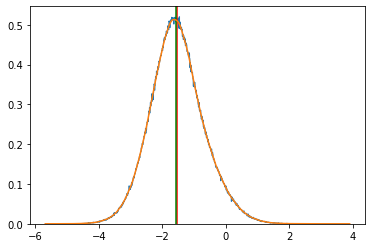

In [3]:
rep_l = 1000000
adftest_l = np.ones(rep_l)

# simulate
T = 10000
for i in tqdm(range(0,rep_l)):
    u = np.random.normal(loc=0,scale=1,size=T)
    W = 1/np.sqrt(T)*np.cumsum(u)
    W[0] = 0

    adftest_l[i] = (1/2*(W[T-1]**2-1) - W[T-1]*1/T*np.sum(W))/ \
    ((1/T*np.sum(W**2)-(1/T*np.sum(W))**2)**0.5)
    
# plot 1
n, x, _ = plt.hist(adftest_l, bins=1000,
                   histtype=u'step', density=True)  
plt.axvline(np.mean(adftest_l),c="red")
plt.axvline(np.median(adftest_l),c="green")

# Plot 2
density = stats.gaussian_kde(adftest_l)
plt.plot(x, density(x))

In [5]:
cr_pt = [1,2.5,5,10,20,50,80,90,95,97.5,99]
print(pd.DataFrame({
    "Critical Point":cr_pt,
    "Test Stat":np.percentile(a=adftest_l,q=cr_pt)
}).to_markdown(index=None))

|   Critical Point |   Test Stat |
|-----------------:|------------:|
|              1   |  -3.41954   |
|              2.5 |  -3.11536   |
|              5   |  -2.85724   |
|             10   |  -2.56592   |
|             20   |  -2.21811   |
|             50   |  -1.5678    |
|             80   |  -0.865317  |
|             90   |  -0.440923  |
|             95   |  -0.0778194 |
|             97.5 |   0.239617  |
|             99   |   0.603411  |
